In [145]:
# RNN

In [146]:
import math
import numpy as np
import matplotlib.pyplot as plt
from gympy.layers import Tanh, Softmax, Linear, Relu, Sigmoid
from gympy.networks import RNN, DataSet
from gympy.optimizers import SGD, Adam, ExponentialDecay, TimeDecay
from gympy.loss import CategoricalCrossEntropy, MeanSquaredError

In [147]:
sin_wave = np.array([math.sin(0.5*x) for x in np.arange(200)])

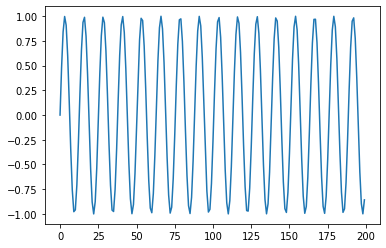

In [148]:
plt.plot(sin_wave)

(185, 1, 15)
(185, 1, 1)
185


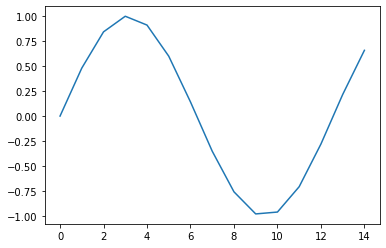

In [149]:
data = DataSet()
data.from_timeseries(sin_wave.reshape(1,-1),len_seq=15)
print(data.x.shape)
print(data.y.shape)
print(data.batch_size)
plt.plot(data.x[0,:,:].reshape(-1))

In [150]:
rnn = RNN(
    n_input=1, 
    n_hidden=10,
    n_output=1, 
    layer_hidden=Tanh,
    layer_output=Linear, 
    loss=MeanSquaredError(), 
    optimizer=Adam(
        learning_rate=0.01,
        decay = ExponentialDecay(rate=0.9),
        epsilon=1e-8,
        beta1=0.8,
        beta2=0.9,
    ),
    truncate=5
)

rnn.type


<RnnEnum.many_one: 'many_one'>

In [151]:
y,a =rnn.forward(data.x[0,:,:])
print(y.shape, a.shape)

(1, 15) (10, 15)


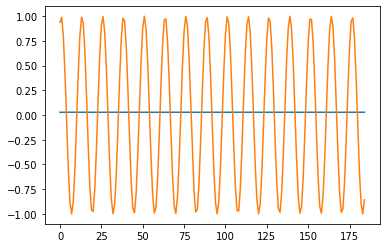

In [152]:
y_pred = rnn.predict_batch(data.x)
plt.plot(y_pred)
plt.plot(data.y.reshape(-1))

In [153]:
data.x[0,:,:]

array([[ 0.        ,  0.47942554,  0.84147098,  0.99749499,  0.90929743,
         0.59847214,  0.14112001, -0.35078323, -0.7568025 , -0.97753012,
        -0.95892427, -0.70554033, -0.2794155 ,  0.21511999,  0.6569866 ]])

In [154]:
rnn.get_loss(data.x[0,:,:],data.y[0,:,:])

[[0.0282899]] [[0.93799998]]


0.8275724311926073

0 cost 0.11911251976860915 iter 186
1 cost 0.0733492363701455 iter 371
2 cost 0.011817705683813533 iter 556
3 cost 0.005840747426469794 iter 741


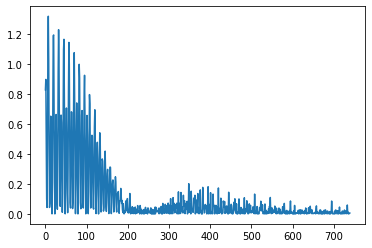

In [155]:
rnn.train_dataset(data,show=1, n_epochs=4)
plt.plot(rnn.cost)

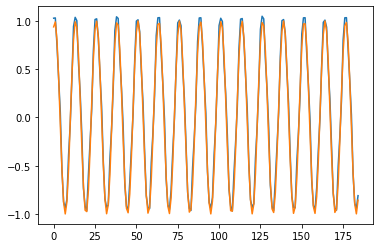

In [156]:
y_pred = rnn.predict_batch(data.x)
plt.plot(y_pred)
plt.plot(data.y.reshape(-1))